$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$
### ITCS6156

# Linear Model for Classification

The linear model 

$$ \Ym = \Xm \wv $$

can be used for classification. 

For this, simply we can discretize the output $\Ym$ for prediction. 
Here the error function can be written 

$$
E = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1} \Big[ \sign(\wv^\top \xv_i) \ne t_i \Big] 
$$

This error function contains discrete functions such as $\sign$ and the indicator delta function. 
Thus, the error function is not derivable, so we need a new approach to solve it. 

## The Perceptron Algorithm

Let us consider a simple binary classifcation as our target problem. 
A single perceptron is a **linear model** that applies a step function on the linear output. 
For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. 

Let us consider the case of misclassification. 
For **positive class** example, $\xv_i$, 

$$
y_i = \wv^{(k)} \xv_i < 0.
$$

To fix this classification error, we want to update the weight $\wv^{(k)}$ to increase the output $y_i$.
Thus, we expect

$$
 \wv^{(k+1)} \xv_i >  \wv^{(k)} \xv_i.
$$

This can be reached by using $\xv_i$ as a gradient as follows: 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha \xv_i
$$

where $\alpha$ is the **learning rate**. 

When the sample $t_i$ is **negative**, we need to do the opposite

$$
 \wv^{(k+1)} \xv_i <  \wv^{(k)} \xv_i.
$$

To combine both positive and negative cases, we can use the target sample $t_i$ in our update, 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$


When the data is not linearly separable, there is **no guarantee on convergence**. Thus, for training, we need to set the **maximum number of iteration**. Also, the algorithm selects an arbitrary **hyperplane** that divides two classes, so it is possible to discover a decision boundary that is not the best. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

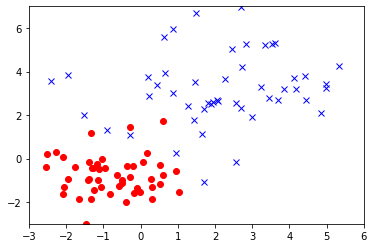

In [30]:
# Example data
mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

C1 = np.random.multivariate_normal(mu1, cov1, 50)
C2 = np.random.multivariate_normal(mu2, cov2, 50)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

X = np.vstack((C1, C2))
N = X.shape[0]
X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))

T = np.ones(N)
T[:50] *= -1 

End of training:  999


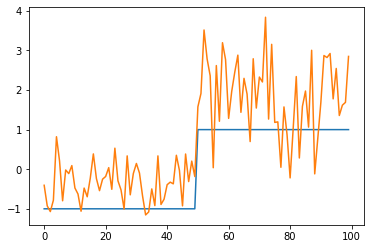

In [31]:
#### perceptron learning

maxiter = 1000
alpha = 0.1

w = np.zeros(3) 

plt.plot(T)

# perceptron algorithm
for i in range(maxiter):
    converged = True
    for k in range(N):
        for x, t in zip(X1, T):
            y = np.dot(w, x)
            yt = 1.0 if (y > 0) else -1.0
            
            if y != yt:
                converged = False
                delta = t - yt
                w += (alpha * delta * x)
    
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
plt.plot(X1@w)


(-3, 7)

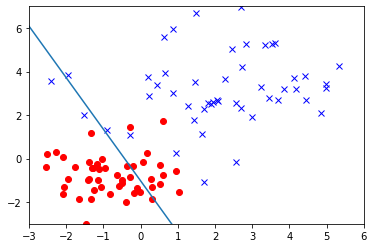

In [32]:
# show decision boundary 
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')


xt = np.array([-3, 5])
yt = -w[1] * xt / w[2] - w[0] / w[2]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])

# Pocket Algorithm for Training Perceptron

To overcome the unstability of the previous algorithm, the pocket algorithm keeps the best solution so far *in its pocket*. Thus, $\wv_{pocket}$ will contain the best solution so far.  

pocket update at:  0
End of training:  9999


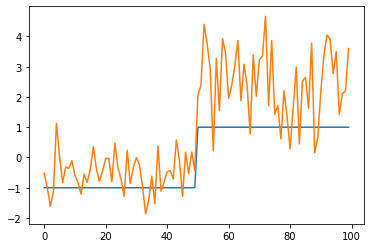

In [35]:
from copy import deepcopy as copy 


maxiter = 10000
alpha = 0.1


# return 1 if w is better -1 if wp is better
def compare(X, T, w, wp):
    y = np.sign(X @ w)
    yp = np.sign(X @ wp)

    return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    

w = np.zeros(3)
w_pocket = copy(w)
missed_pocket = N + 1

plt.plot(T)

# pocket algorithm
for i in range(maxiter):
    converged = True
    for k in range(N):
        missed = 0
        for x, t in zip(X1, T):
            y = np.dot(w, x)
            yt = 1.0 if (y > 0) else -1.0
            
            if y != yt:
                missed += 1
                converged = False
                delta = t - yt
                w += (alpha * delta * x)
    #print(missed)
    if missed < missed_pocket:
        print("pocket update at: ", i)
        w_pocket = w
        missed_pocket = missed
    
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
plt.plot(X1@w_pocket)

(-3, 7)

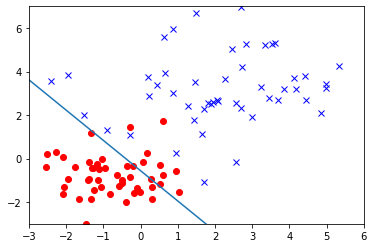

In [36]:
# show decision boundary 
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')


xt = np.array([-3, 5])
yt = -w_pocket[1] * xt / w_pocket[2] - w_pocket[0] / w_pocket[2]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])

# Ordinary Least Squares for Classification



Can we use the ordinary least squares for regression on classificaiton problem? 

Remember your answer in your mind. Let us answer to this question in class. 

Until then, assuming that it is possible, try it here and plot it.
Does the results here have the same answer? 

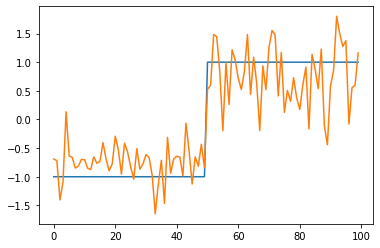

In [37]:
# linear regression for the classifcation

# X1 already contains X and one's column for bias
w_ls = np.linalg.inv(X1.transpose().dot(X1)).dot(X1.transpose()).dot(T)

Y =  X1.dot(w_ls)

# plot
plt.plot(T)
plt.plot(Y)

(-3, 7)

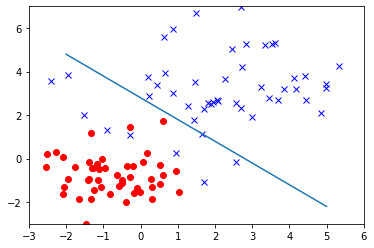

In [38]:
# plot results with decision boundary
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')


xt = np.array([-2, 5])
yt = -w_ls[1] * xt / w_ls[1] - w_ls[0] / w_ls[1]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])

# Measurements

How to evaluate a machine learning model is critical for the choice of right tools and performance. For various reason, there are several classification measurements to meet different needs for practical applications. 
In this section, we examine popular measures. 

One naive evaluation we can think of is the rate or percentage or correct classification. 
That is, when there are 1000 target lables to classify, if 950 are correctly classified, we can say 95% accuracy: 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

This measure, however, can be **uninformative**, especially when the importance of each class is different. 
As in our previous discussion about imbalance of data samples, sometimes we need to care more a specific class.
For this, confusion matrix lists all the counts for all classes. 

## Confusion Matrix

Here is an example confusion matrix. 

|   | - | + 
| --|--|--
| - | 439 | 28
| + | 22 | 511
 
 <center>Table 1. Example Confusion Matrix </center>
 
 Here, each row represents the predictions from model and column represents the actual classes.
 So, we can read this that for negative samples, 439 samples are correctly classified while 511 samples are correctly classified for positive data. Overall the accuracy is 95% but with confusion matrix we have more information about the classification results. 

Here follows the short implementation of confusion matrix.
Read through the codes and let me know if you have a question in class. 


In [39]:
import numpy as np 
import pandas as pd

In [40]:
# Confustion matrix 

def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [41]:
Y = np.array([1,2,1,1,1,2,3,4])
T = np.array([1,3,1,2,1,2,4,4])

confusion_matrix(Y, T)

,1,2,3,4
1,3,1,0,0
2,0,1,1,0
3,0,0,0,1
4,0,0,0,1



| | - | + 
| --|--|--
| - | True Negative (TN) | False Negative (FN)
| + | False Positive (FP) | True Positive (TP)


## Precision and Recall

- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$


## F1 Score

For convenience, many people want a single measure rather than multiple as above. For those, we can provide the harmonic mean of precision and recall. 

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$


Here, we consider two difference cases with precision and recall, (0.5, 0.5) and (0.9, 0.1).
$$F1 = 2 \times (0.5 * 0.5 ) = 0.5$$
$$F1 = 2 \times (0.9 * 0.1 ) = 0.18$$

We can see that F1 score favors the similar precision and recall values. 


## MCC (Matthews Correlation Coefficient)

MCC uses all the counts in confusion matrix for the metric. 

$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$




## The ROC (Receiver Operating Characteristic) Curve

The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). 
As in the figure below, starting from the boundary (or threshold) with 0% of false positive rate, moving the boundary, it shows the true positive rate by including more false positive areas.
When the classification results are good, the curve gets close to retangular curve, close to 1 on the 0 FPR. 

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)
(image from wikipedia)


## AUC (Area Under the Curve)

For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve. 



# Practice

1. Using the Table 1., compute precision, recall, specificity, and MCC.

2. Download https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb and run. 
   Report the auc value from the first run of roc_auc_score in the notebook.

- Answer: 0.9604938554008616

### Cheat Sheet
* Binary classification performances measure cheat sheet: http://www.damienfrancois.be/blog/files/modelperfcheatsheet.pdf

### references

* Chapter 3
* The Best Metric to Measure Accuracy of Classification Models: http://www.kdnuggets.com/2016/12/best-metric-measure-accuracy-classification-models.html/2


# Appendix

## Understanding various means

### Pythagorean means 

1. Arithmetic mean : 
$$
AM(x_1, \cdots, x_n) = \frac{1}{n} (x_1 + \cdots + x_n)
$$
2. Geometric mean : 
$$
GM(x_1, \cdots, x_n) = \sqrt{ x_1 \times \cdots \times x_n }
$$
3. Harmonic mean : 
$$
HM(x_1, \cdots, x_n) = \frac{n}{\frac{1}{x_1} + \cdots + \frac{1}{x_n} }
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MathematicalMeans.svg" width=500 />
(image from wikipedia.org)

# References


Rosenblatt, Frank (1957), The Perceptron--a perceiving and recognizing automaton. Report 85-460-1, Cornell Aeronautical Laboratory.

Gallant, S. I. Perceptron-based learning algorithms. IEEE Transactions on Neural
Networks 1 (1990), 179–191.

